In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def plotnormalize(normalize_static, normalize_treedict, normalize_treegrowth, xlim, area):

    
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,3))
    
    axs[1].bar(normalize_treedict.keys(), normalize_treedict, width=1/15, color='C2')
    axs[1].set_title('tree dictionary')
    axs[1].set_xlabel('intersection score', fontsize=14)

    axs[0].bar(normalize_static.keys(), normalize_static,  width=1/15, color='C2')
    axs[0].set_ylabel('normalized frequency', fontsize=14)
    axs[0].set_title('static')
    axs[0].set_xlabel('intersection score', fontsize=14)
    
    axs[2].bar(normalize_treegrowth.keys(), normalize_treegrowth,  width=1/15, color='C2')
    axs[2].set_title('tree growth')
    axs[2].set_xlabel('intersection score', fontsize=14)

    plt.xlim(xlim[0], xlim[1])
    plt.tight_layout()
#     fig.autofmt_xdate()
    plt.savefig('plots/hists_normalized_{}'.format(area), dpi=300)
    plt.show()

# Wallengebied

In [3]:
# retrieve static method shapefile results and merge on id
df_wallen_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_static.csv")
df_wallen_static_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_static_polygonen.csv")
display(df_wallen_static_pol)
id_wallen_static_pol = []
for i, row in df_wallen_static_pol.iterrows():
    number = row['uid'][3:9]
    id_wallen_static_pol.append(int(number))
df_wallen_static_pol_2 = df_wallen_static[df_wallen_static['number'].isin(id_wallen_static_pol)]

# normalize counts
occurence_wallen_static = df_wallen_static['count'].value_counts()
occurence_shapefiles_static = df_wallen_static_pol_2['count'].value_counts()
normalize_static_wallen = occurence_shapefiles_static / occurence_wallen_static

,uid,type,parents,children,attribute.function
0,id-339738_marginal,SolitaryVegetationObject,NaN,NaN,something
1,id-348099_marginal,SolitaryVegetationObject,NaN,NaN,something
2,id-339736_marginal,SolitaryVegetationObject,NaN,NaN,something
3,id-348098_marginal,SolitaryVegetationObject,NaN,NaN,something
4,id-339969_marginal,SolitaryVegetationObject,NaN,NaN,something
...,...,...,...,...,...
195,id-347649_marginal,SolitaryVegetationObject,NaN,NaN,something
196,id-340202_marginal,SolitaryVegetationObject,NaN,NaN,something
197,id-340200_marginal,SolitaryVegetationObject,NaN,NaN,something
198,id-347172_marginal,SolitaryVegetationObject,NaN,NaN,something


In [4]:
# retrieve treedict method shapefile results and merge on id
df_wallen_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_treedict.csv")
df_wallen_treedict_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treedict_polygonen.csv")
id_wallen_treedict_pol = []
for i, row in df_wallen_treedict_pol.iterrows():
    number = row['uid'][3:9]
    id_wallen_treedict_pol.append(int(number))
df_wallen_treedict_pol_2 = df_wallen_treedict[df_wallen_treedict['number'].isin(id_wallen_treedict_pol)]


# normalize counts
occurence_wallen_treedict = df_wallen_treedict['count'].value_counts()
occurence_shapefiles_treedict = df_wallen_treedict_pol_2['count'].value_counts()
normalize_treedict_wallen = occurence_shapefiles_treedict / occurence_wallen_treedict

In [5]:
# retrieve treegrowth method shapefile results and merge on id
df_wallen_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_treegrowth.csv")
df_wallen_treegrowth_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treegrowth_polygonen.csv")
id_wallen_treegrowth_pol = []
for i, row in df_wallen_treegrowth_pol.iterrows():
    number = row['uid'][3:9]
    id_wallen_treegrowth_pol.append(int(number))
df_wallen_treegrowth_pol_2 = df_wallen_treegrowth[df_wallen_treegrowth['number'].isin(id_wallen_treegrowth_pol)]


# normalize counts
occurence_wallen_treegrowth = df_wallen_treegrowth['count'].value_counts()
occurence_shapefiles_treegrowth = df_wallen_treegrowth_pol_2['count'].value_counts()
normalize_treegrowth_wallen = occurence_shapefiles_treegrowth / occurence_wallen_treegrowth

In [6]:
# retrieve results from point intersection
wallen_static_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_static_punten.npy")
wallen_treedict_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treedict_punten.npy")
wallen_treegrowth_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treegrowth_punten.npy")

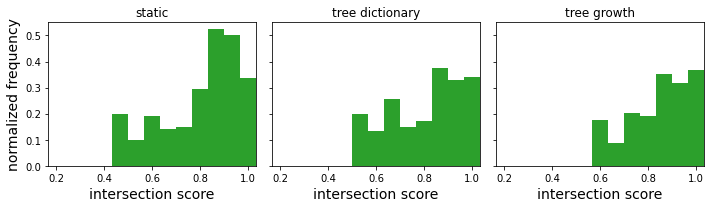

In [7]:
xlim = (0.2-1/30, 1+1/30)
area = 'wallen'
plotnormalize(normalize_static_wallen, normalize_treedict_wallen, normalize_treegrowth_wallen, xlim, area)


# IJburg

In [8]:
# retrieve static method shapefile results and merge on id
df_ijburg_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_static.csv")
df_ijburg_static_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_static_polygonen.csv")
id_ijburg_static_pol = []
for i, row in df_ijburg_static_pol.iterrows():
    number = row['uid'][3:9]
    id_ijburg_static_pol.append(int(number))
df_ijburg_static_pol_2 = df_ijburg_static[df_ijburg_static['number'].isin(id_ijburg_static_pol)]

# normalize counts
occurence_ijburg_static = df_ijburg_static['count'].value_counts()
occurence_shapefiles_static = df_ijburg_static_pol_2['count'].value_counts()
normalize_static_ijburg = occurence_shapefiles_static / occurence_ijburg_static

# retrieve treedict method shapefile results and merge on id
df_ijburg_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_treedict.csv")
df_ijburg_treedict_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treedict_polygonen.csv")
id_ijburg_treedict_pol = []
for i, row in df_ijburg_treedict_pol.iterrows():
    number = row['uid'][3:9]
    id_ijburg_treedict_pol.append(int(number))
df_ijburg_treedict_pol_2 = df_ijburg_treedict[df_ijburg_treedict['number'].isin(id_ijburg_treedict_pol)]

# normalize counts
occurence_ijburg_treedict = df_ijburg_treedict['count'].value_counts()
occurence_shapefiles_treedict = df_ijburg_treedict_pol_2['count'].value_counts()
normalize_treedict_ijburg = occurence_shapefiles_treedict / occurence_ijburg_treedict

# retrieve treegrowth method shapefile results and merge on id
df_ijburg_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_treegrowth.csv")
df_ijburg_treegrowth_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treegrowth_polygonen.csv")
id_ijburg_treegrowth_pol = []
for i, row in df_ijburg_treegrowth_pol.iterrows():
    number = row['uid'][3:9]
    id_ijburg_treegrowth_pol.append(int(number))
df_ijburg_treegrowth_pol_2 = df_ijburg_treegrowth[df_ijburg_treegrowth['number'].isin(id_ijburg_treegrowth_pol)]

# normalize counts
occurence_ijburg_treegrowth = df_ijburg_treegrowth['count'].value_counts()
occurence_shapefiles_treegrowth = df_ijburg_treegrowth_pol_2['count'].value_counts()
normalize_treegrowth_ijburg = occurence_shapefiles_treegrowth / occurence_ijburg_treegrowth

In [9]:
# retrieve results from point intersection
ijburg_static_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_static_punten.npy")
ijburg_treedict_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treedict_punten.npy")
ijburg_treegrowth_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treegrowth_punten.npy")


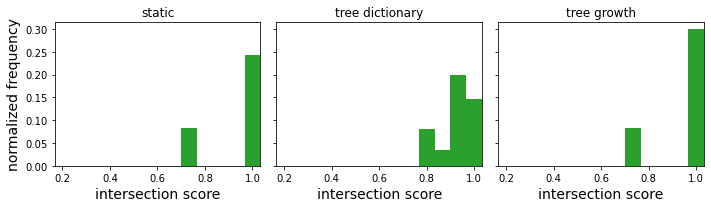

In [10]:
xlim = (0.2-1/30, 1+1/30)
area = 'ijburg'
plotnormalize(normalize_static_ijburg, normalize_treedict_ijburg, normalize_treegrowth_ijburg, xlim, area)


# Sarphatipark


In [11]:
# retrieve static method shapefile results and merge on id
df_sarphati_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_static.csv")
df_sarphati_static_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_static_polygonen.csv")
id_sarphati_static_pol = []
for i, row in df_sarphati_static_pol.iterrows():
    number = row['uid'][3:9]
    id_sarphati_static_pol.append(int(number))
df_sarphati_static_pol_2 = df_sarphati_static[df_sarphati_static['number'].isin(id_sarphati_static_pol)]

# normalize counts
occurence_sarphati_static = df_sarphati_static['count'].value_counts()
occurence_shapefiles_static = df_sarphati_static_pol_2['count'].value_counts()
normalize_static_sarphati = occurence_shapefiles_static / occurence_sarphati_static

# retrieve treedict method shapefile results and merge on id
df_sarphati_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_treedict.csv")
df_sarphati_treedict_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treedict_polygonen.csv")
id_sarphati_treedict_pol = []
for i, row in df_sarphati_treedict_pol.iterrows():
    number = row['uid'][3:9]
    id_sarphati_treedict_pol.append(int(number))
df_sarphati_treedict_pol_2 = df_sarphati_treedict[df_sarphati_treedict['number'].isin(id_sarphati_treedict_pol)]

# normalize counts
occurence_sarphati_treedict = df_sarphati_treedict['count'].value_counts()
occurence_shapefiles_treedict = df_sarphati_treedict_pol_2['count'].value_counts()
normalize_treedict_sarphati = occurence_shapefiles_treedict / occurence_sarphati_treedict

# retrieve treegrowth method shapefile results and merge on id
df_sarphati_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_treegrowth.csv")
df_sarphati_treegrowth_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treegrowth_polygonen.csv")
id_sarphati_treegrowth_pol = []
for i, row in df_sarphati_treegrowth_pol.iterrows():
    number = row['uid'][3:9]
    id_sarphati_treegrowth_pol.append(int(number))
df_sarphati_treegrowth_pol_2 = df_sarphati_treegrowth[df_sarphati_treegrowth['number'].isin(id_sarphati_treegrowth_pol)]

# normalize counts
occurence_sarphati_treegrowth = df_sarphati_treegrowth['count'].value_counts()
occurence_shapefiles_treegrowth = df_sarphati_treegrowth_pol_2['count'].value_counts()
normalize_treegrowth_sarphati = occurence_shapefiles_treegrowth / occurence_sarphati_treegrowth

In [12]:
# retrieve results from point intersection
sarphati_static_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_static_punten.npy")
sarphati_treedict_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treedict_punten.npy")
sarphati_treegrowth_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treegrowth_punten.npy")

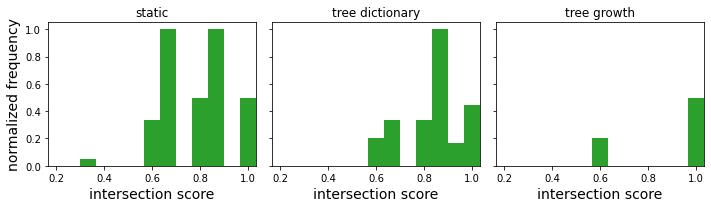

In [13]:
xlim = (0.2-1/30, 1+1/30)
area = 'sarphati'
plotnormalize(normalize_static_sarphati, normalize_treedict_sarphati, normalize_treegrowth_sarphati, xlim, area)
